In [1]:
# import requirement libraries and tools
from tensorflow import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Conv2DTranspose, Reshape, BatchNormalization, Dropout, Input, ReLU, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import BinaryCrossentropy
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import pandas as pd
import random

import warnings
warnings.filterwarnings('ignore')

In [2]:
!unzip /content/archive_5.zip -d /content/image_dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/image_dataset/healthy/0402.jpg  
  inflating: /content/image_dataset/healthy/0403.jpg  
  inflating: /content/image_dataset/healthy/0404.jpg  
  inflating: /content/image_dataset/healthy/0405.jpg  
  inflating: /content/image_dataset/healthy/0406.jpg  
  inflating: /content/image_dataset/healthy/0407.jpg  
  inflating: /content/image_dataset/healthy/0408.jpg  
  inflating: /content/image_dataset/healthy/0409.jpg  
  inflating: /content/image_dataset/healthy/0410.jpg  
  inflating: /content/image_dataset/healthy/0411.jpg  
  inflating: /content/image_dataset/healthy/0412.jpg  
  inflating: /content/image_dataset/healthy/0413.jpg  
  inflating: /content/image_dataset/healthy/0414.jpg  
  inflating: /content/image_dataset/healthy/0415.jpg  
  inflating: /content/image_dataset/healthy/0416.jpg  
  inflating: /content/image_dataset/healthy/0417.jpg  
  inflating: /content/image_dataset/healthy/0418.jpg  
  inflating: /

In [3]:
# Loading and Preparing Anime Face Images Dataset using Keras Image Data Generator
img_width, img_height = 256, 256
batchsize = 32

train = keras. utils.image_dataset_from_directory(
    directory='/content/image_dataset',
    batch_size = batchsize,
    image_size = (img_width, img_height))

Found 7023 files belonging to 4 classes.


In [4]:
# Generating Augmented Batches of Anime Face Images using ImageDataGenerator
DIR = '/content/image_dataset' #path

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip = True)


train_generator = train_datagen.flow_from_directory(
        DIR,
        target_size = (64, 64),
        batch_size = batchsize,
        class_mode = None)

#train_generator[0]

Found 7023 images belonging to 4 classes.


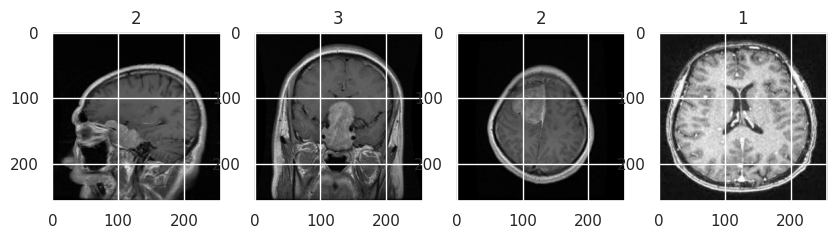

In [5]:
# Visualizing a Batch of Face Images

data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(10,10))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32768)               │       9,863,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 16, 16, 256)         │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 32, 32, 128)         │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 64, 64, 64)          │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 3)           │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,619,203 (48.14 MB)

 Trainable params: 12,619,203 (48.14 MB)

 Non-trainable params: 0 (0.00 B)

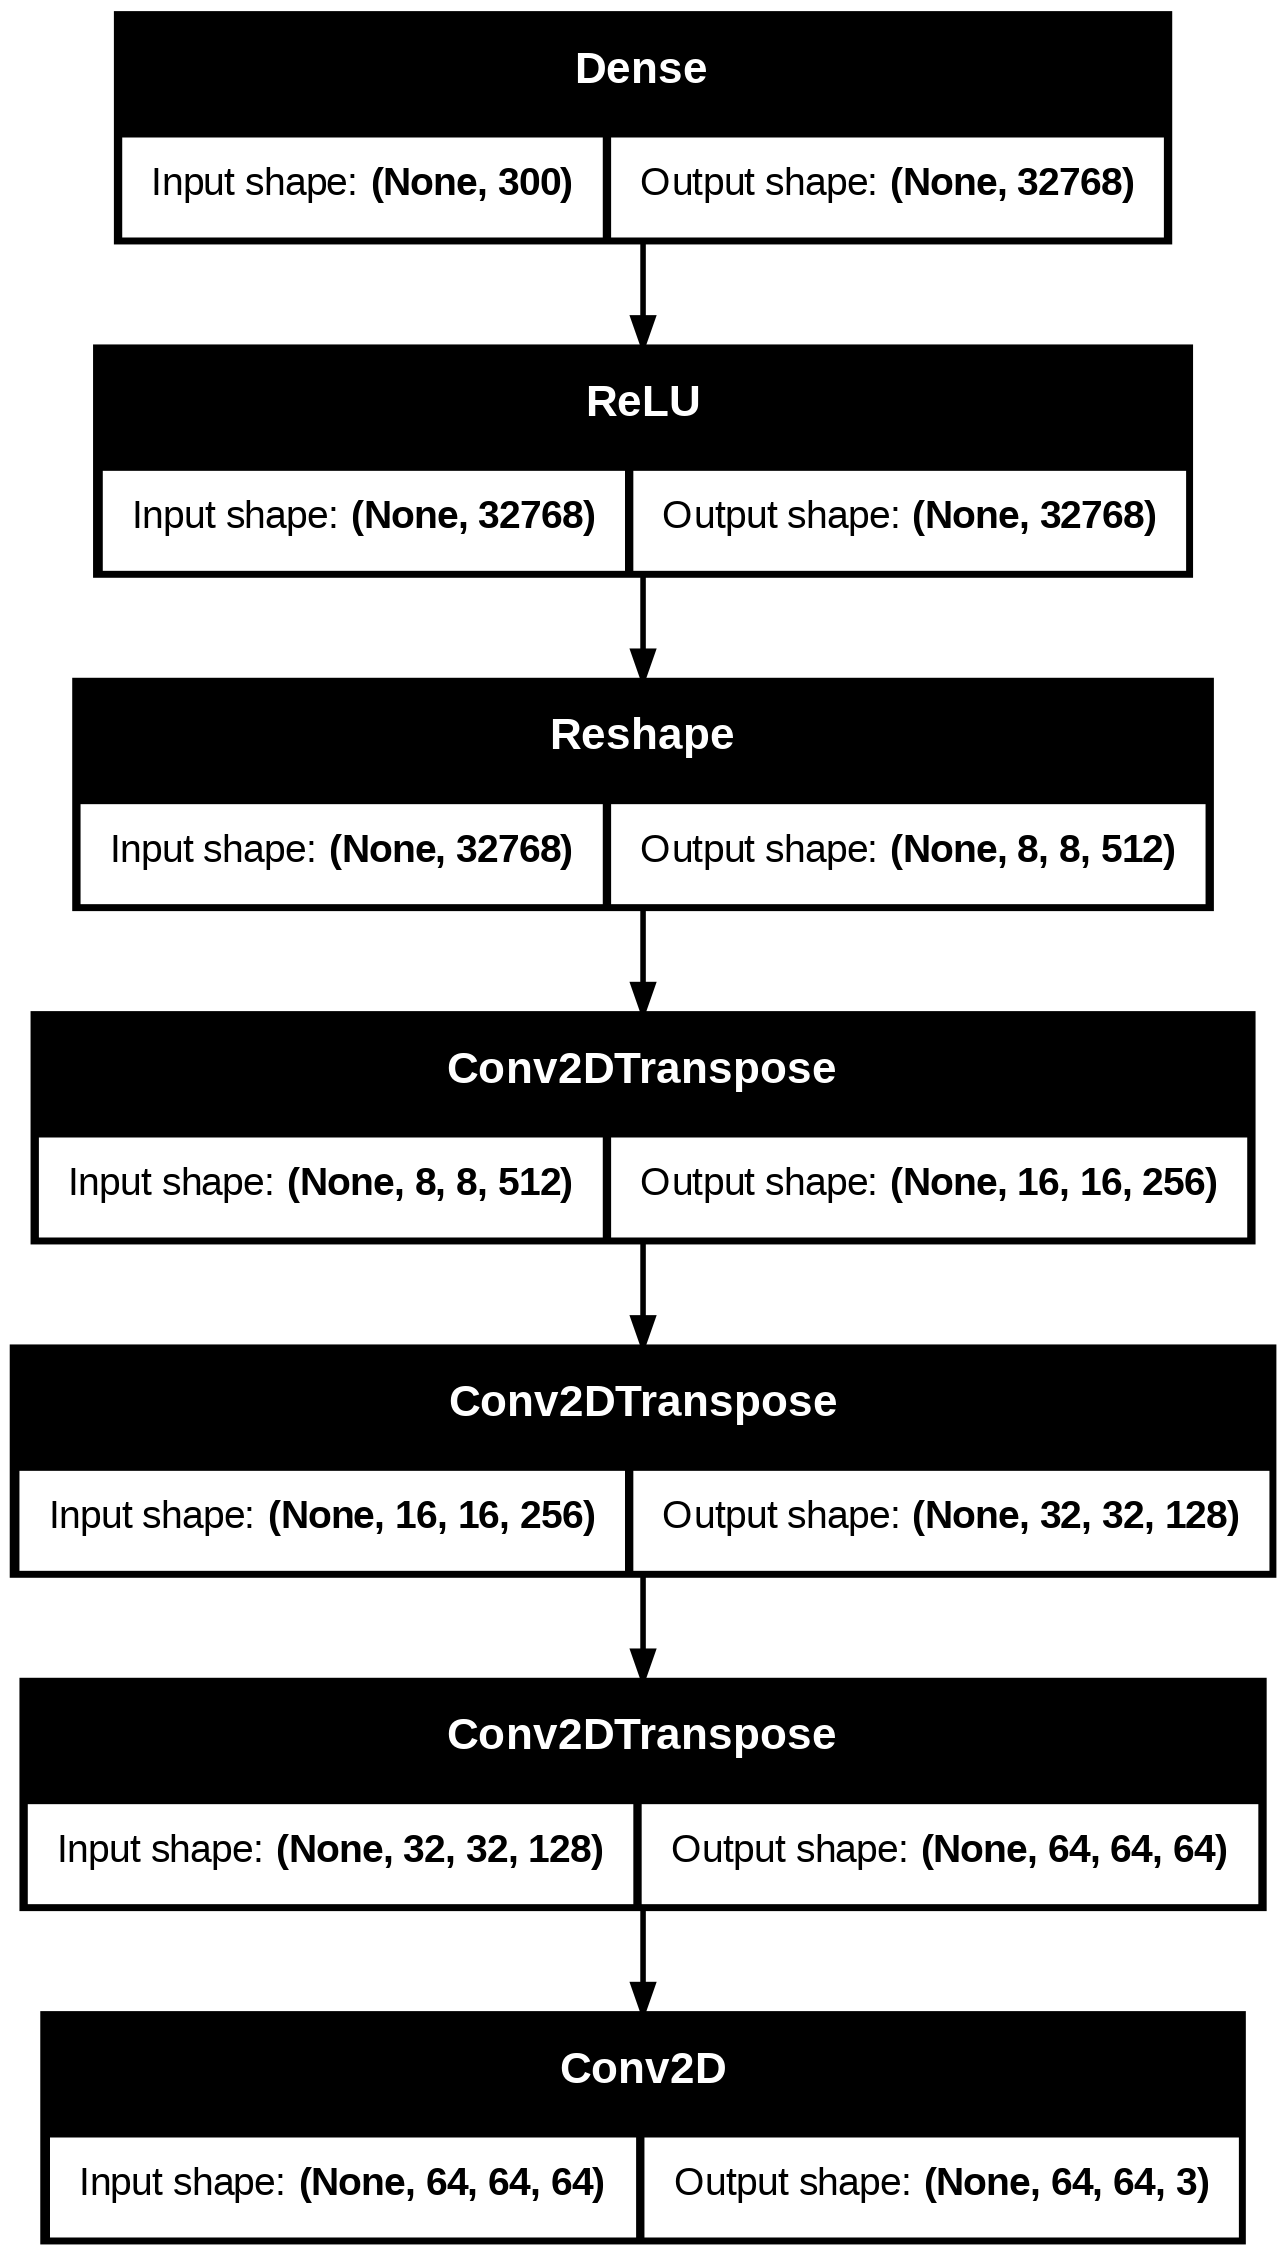

In [6]:
# Creating the Generator Model

KI = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
input_dim = 300

def Generator_Model():

    Generator = Sequential()

    # Random noise
    Generator.add(Dense(8 * 8 * 512, input_dim = input_dim))
    Generator.add(ReLU())
    # Convert 1d to 3d
    Generator.add(Reshape((8, 8, 512)))
    # Unsample
    Generator.add(Conv2DTranspose(256, (4, 4), strides=(2, 2), padding='same', kernel_initializer=KI, activation='relu'))
    Generator.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', kernel_initializer=KI, activation='relu'))
    Generator.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', kernel_initializer=KI, activation='relu'))
    Generator.add(Conv2D(3, (4, 4), padding='same', activation='sigmoid'))


    return Generator

generator = Generator_Model()
generator.summary()
# Visualized Layers of generator
keras.utils.plot_model(generator, show_shapes=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 29, 29, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,730,625 (10.42 MB)

 Trainable params: 2,730,625 (10.42 MB)

 Non-trainable params: 0 (0.00 B)

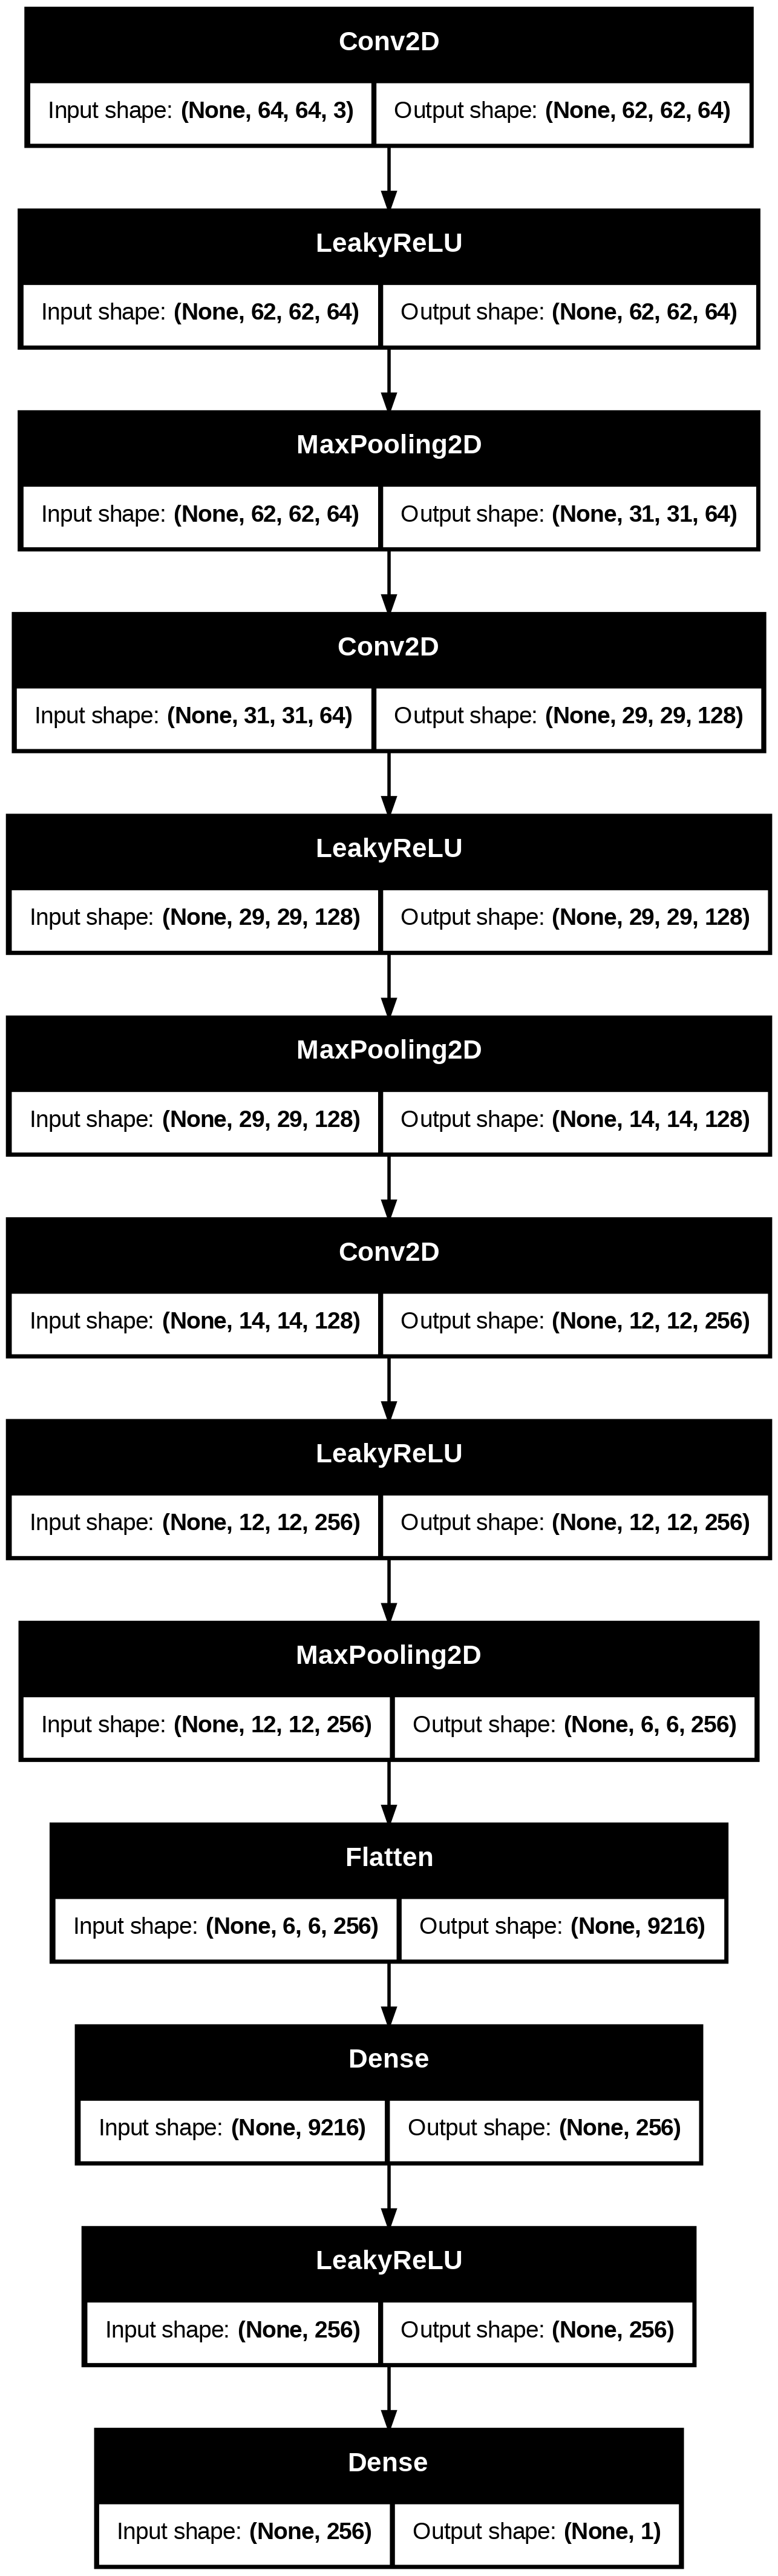

In [7]:
# Creating the Discriminator Model

KI = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
input_dim = 300

def Discriminator_Model(input_shape=(64, 64, 3)):
    """Creates a discriminator model for a GAN."""

    # Initialize the Sequential model
    discriminator = Sequential()

    # First convolutional block
    discriminator.add(Conv2D(64, kernel_size=(3, 3), input_shape=input_shape))
    discriminator.add(LeakyReLU())  # Add LeakyReLU as a separate layer
    discriminator.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional block
    discriminator.add(Conv2D(128, kernel_size=(3, 3)))
    discriminator.add(LeakyReLU())  # Add LeakyReLU as a separate layer
    discriminator.add(MaxPooling2D(pool_size=(2, 2)))

    # Third convolutional block
    discriminator.add(Conv2D(256, kernel_size=(3, 3)))
    discriminator.add(LeakyReLU())  # Add LeakyReLU as a separate layer
    discriminator.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and dense layers
    discriminator.add(Flatten())
    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU())  # Add LeakyReLU as a separate layer
    discriminator.add(Dense(1, activation='sigmoid'))

    return discriminator

# Instantiate and summarize the discriminator model
# Changed line: calling the correctly named function 'Discriminator_Model'
discriminator = Discriminator_Model()
discriminator.summary()

# Visualize the layers of the discriminator model
keras.utils.plot_model(discriminator, show_shapes=True)

In [8]:
# DCGAN Model Training Step with Discriminator and Generator

class DCGAN(keras.Model):
    def __init__(self, generator, discriminator, latent_dim = input_dim):
        super().__init__()
        self.generator = generator
        self.discriminator = discriminator
        self.latent_dim = latent_dim
        self.g_loss_metric = keras.metrics.Mean(name='g_loss')
        self.d_loss_metric = keras.metrics.Mean(name='d_loss')

    @property
    def metrics(self):
        return [self.g_loss_metric, self.d_loss_metric]

    def compile(self, g_optimizer, d_optimizer, loss_fn):
        super(DCGAN, self).compile()
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_images):
        # get batch size from the data
        batch_size = tf.shape(real_images)[0]
        # generate random noise
        random_noise = tf.random.normal(shape=(batch_size, self.latent_dim))

        # train the discriminator with real (1) and fake (0) images
        with tf.GradientTape() as tape:
            # compute loss on real images
            pred_real = self.discriminator(real_images, training=True)
            # generate real image labels
            real_labels = tf.ones((batch_size, 1))
            # label smoothing
            real_labels += 0.05 * tf.random.uniform(tf.shape(real_labels))
            d_loss_real = self.loss_fn(real_labels, pred_real)

            # compute loss on fake images
            fake_images = self.generator(random_noise)
            pred_fake = self.discriminator(fake_images, training=True)
            # generate fake labels
            fake_labels = tf.zeros((batch_size, 1))
            d_loss_fake = self.loss_fn(fake_labels, pred_fake)

            # total discriminator loss
            d_loss = (d_loss_real + d_loss_fake) / 2

        # compute discriminator gradients
        gradients = tape.gradient(d_loss, self.discriminator.trainable_variables)
        # update the gradients
        self.d_optimizer.apply_gradients(zip(gradients, self.discriminator.trainable_variables))


        # train the generator model
        labels = tf.ones((batch_size, 1))
        # generator want discriminator to think that fake images are real
        with tf.GradientTape() as tape:
            # generate fake images from generator
            fake_images = self.generator(random_noise, training=True)
            # classify images as real or fake
            pred_fake = self.discriminator(fake_images, training=True)
            # compute loss
            g_loss = self.loss_fn(labels, pred_fake)

        # compute gradients
        gradients = tape.gradient(g_loss, self.generator.trainable_variables)
        # update the gradients
        self.g_optimizer.apply_gradients(zip(gradients, self.generator.trainable_variables))

        # update states for both models
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)

        return {'d_loss': self.d_loss_metric.result(), 'g_loss': self.g_loss_metric.result()}

In [9]:
# DCGAN Monitor for Image Generation and Model Saving

class DCGANMonitor(keras.callbacks.Callback):
    def __init__(self, num_imgs=25, latent_dim = input_dim):
        self.num_imgs = num_imgs
        self.latent_dim = latent_dim
        # create random noise for generating images
        self.noise = tf.random.normal([25, latent_dim])

    def on_epoch_end(self, epoch, logs = None):
        # generate the image from noise
        g_img = self.model.generator(self.noise)
        # denormalize the image
        g_img = (g_img * 255) + 255
        g_img.numpy()

    def on_train_end(self, logs = None):
        self.model.generator.save('DCGEN.h5')

In [10]:
# Training DCGAN on Image Dataset for 40 Epochs

epochs = 70
lr_g =0.0003
lr_d = 0.0001
beta = 0.5
latent_dim = 300

dcgan = DCGAN(generator=generator, discriminator=discriminator, latent_dim = latent_dim )
dcgan.compile(g_optimizer = Adam (learning_rate= lr_g, beta_1= beta), d_optimizer= Adam (learning_rate = lr_g , beta_1= beta), loss_fn = BinaryCrossentropy())

In [11]:
#train the model

history = dcgan.fit(train_generator, epochs=epochs, callbacks=[DCGANMonitor(num_imgs=25, latent_dim = latent_dim)])

Epoch 1/70
220/220 ━━━━━━━━━━━━━━━━━━━━ 33s 78ms/step - d_loss: 1.7698 - g_loss: 2.4594
Epoch 2/70
220/220 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - d_loss: 0.3063 - g_loss: 2.2029
Epoch 3/70
220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - d_loss: 0.1443 - g_loss: 2.8844
Epoch 4/70
220/220 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - d_loss: 0.1708 - g_loss: 3.5767
Epoch 5/70
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - d_loss: 0.2443 - g_loss: 3.1659
Epoch 6/70
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - d_loss: 0.2575 - g_loss: 3.1142
Epoch 7/70
220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - d_loss: 0.2564 - g_loss: 3.0884
Epoch 8/70
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - d_loss: 0.2479 - g_loss: 2.9579
Epoch 9/70
220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - d_loss: 0.2594 - g_loss: 2.8280
Epoch 10/70
220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - d_loss: 0.3406 - g_loss: 2.8669
Epoch 11/70
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - d_loss: 0.1877 - g_loss: 3.4925
Epoch 12/70
220/220 ━━━━━━━━━━

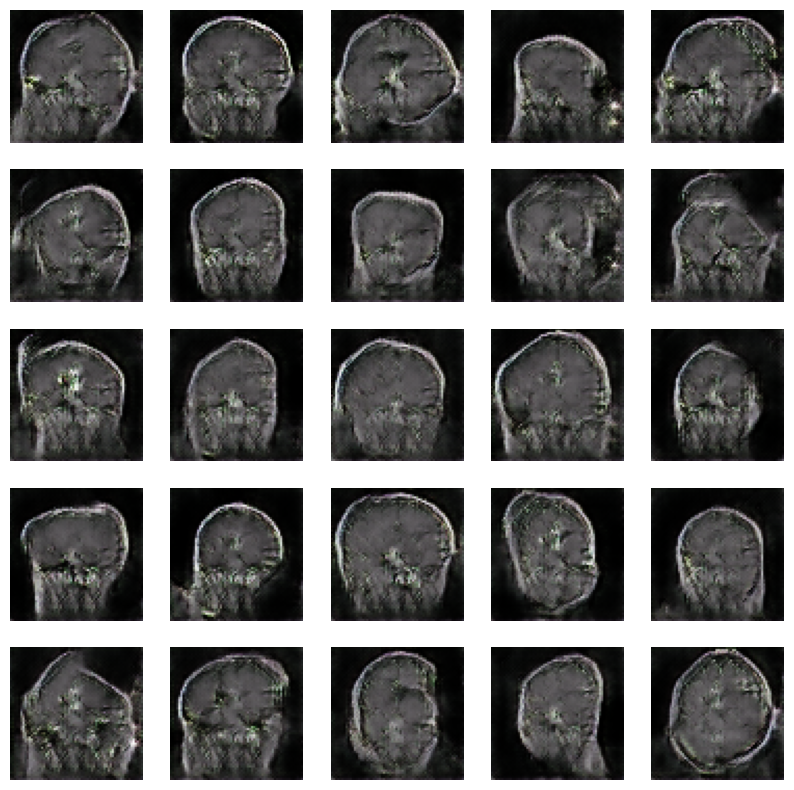

In [20]:
# prompt: plot the generating images

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'dcgan' and 'latent_dim' are defined from the previous code
# and 'DCGEN.h5' has been saved during training.

# Load the trained generator
generator = keras.models.load_model('DCGEN.h5')

# Generate images
num_images = 25
noise = tf.random.normal([num_images, latent_dim])
generated_images = generator(noise)

# Display the generated images
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(generated_images[i])
    ax.axis('off')
plt.show()

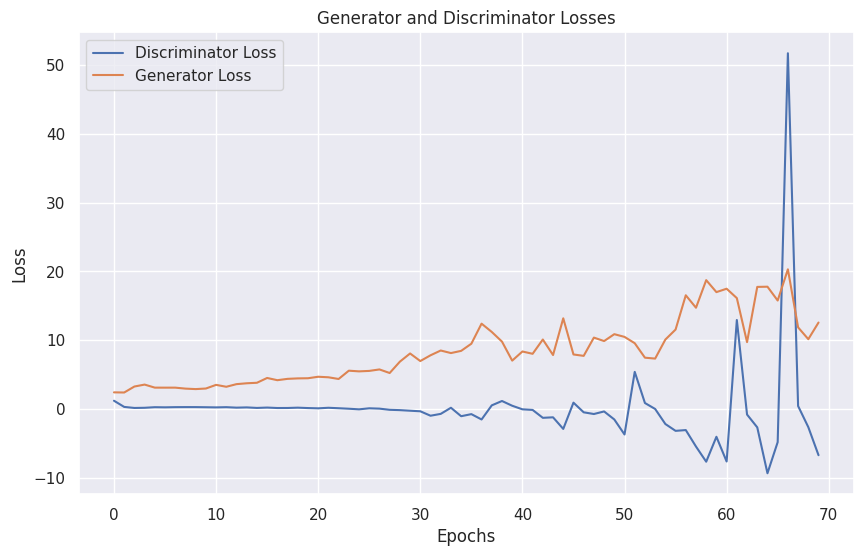

In [13]:
import matplotlib.pyplot as plt

# Function to create a figure for the losses
def create_loss_figure(d_loss_values, g_loss_values):
    plt.figure(figsize=(10, 6))
    plt.plot(d_loss_values, label='Discriminator Loss')
    plt.plot(g_loss_values, label='Generator Loss')
    plt.title('Generator and Discriminator Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Access the loss values from the history
d_loss_values = history.history['d_loss']
g_loss_values = history.history['g_loss']

# Call the create_loss_figure function with the loss values
create_loss_figure(d_loss_values, g_loss_values)

In [18]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import cv2

# Assuming 'dcgan' is your trained DCGAN model and 'train_generator' provides real images
# You'll need to adapt this to your specific data and how you access it.

# Example using a single batch of real images
real_images = next(iter(train_generator))

# Generate corresponding fake images
noise = tf.random.normal([real_images.shape[0], 300]) #Match batch size of real_images
fake_images = dcgan.generator(noise)


# Assuming your images are in the range [0, 255] and are normalized to [0,1] in the model
fake_images = (fake_images * 255) #Denormalize
fake_images = fake_images.numpy()

#Calculate PSNR and SSIM for each image pair
psnr_values = []
ssim_values = []

for i in range (real_images.shape[0]):
  real = np.uint8(real_images[i] * 255) #Denormalize and convert to uint8
  fake = np.uint8(fake_images[i])

  #Convert to grayscale for SSIM calculation (optional but recommended)
  real_gray = cv2.cvtColor(real, cv2.COLOR_BGR2GRAY)
  fake_gray = cv2.cvtColor(fake, cv2.COLOR_BGR2GRAY)

  psnr_value = psnr(real, fake)
  ssim_value = ssim(real_gray, fake_gray)

  psnr_values.append(psnr_value)
  ssim_values.append(ssim_value)

#Print or process the results
print("PSNR Values:", psnr_values)
print("SSIM Values:", ssim_values)

#Calculate and print average PSNR and SSIM
avg_psnr = np.mean(psnr_values)
avg_ssim = np.mean(ssim_values)

print(f"Average PSNR: {avg_psnr}")
print(f"Average SSIM: {avg_ssim}")

PSNR Values: [14.3978406828063, 11.893605486001704, 13.589946614469405, 14.946125372593354, 14.504401752524188, 13.875931342104877, 12.925860920980574, 15.376037413974347, 14.089218857902303, 15.206797499778077, 14.600698006031363, 14.218624870985687, 14.960068557881687, 13.271913186027312, 14.197707323577045, 14.551060958377352, 15.034952407468689, 13.494876480492518, 16.337357214548987, 13.16458452010828, 14.373335091560925, 13.201095900486033, 15.586484374483671, 14.60446598243854, 8.563648733870641, 13.044708453373827, 11.953769565946072, 14.33011368473581, 14.417196717507391, 14.415858703474091, 15.262872217337083, 15.129066324752758]
SSIM Values: [0.12623332693463266, 0.06758888513814797, 0.05142653182224376, 0.2034020583382424, 0.1170457495878583, 0.10489825152814936, 0.04925624797816203, 0.15001054936199476, 0.13153656087614876, 0.16041719637295843, 0.10685746397247674, 0.14871474700572604, 0.19949222952870246, 0.06742943955404047, 0.08067637295591969, 0.10800572305706872, 0.12

In [19]:
# prompt: calculate the dice score

# Calculate Dice score
import numpy as np

def dice_score(real_images, fake_images):
    """
    Calculates the Dice score between two sets of images.

    Args:
        real_images: A NumPy array of real images.
        fake_images: A NumPy array of fake images.

    Returns:
        The Dice score as a float.
    """

    # Ensure images are binary
    real_images = np.round(real_images)  # Round to 0 or 1
    fake_images = np.round(fake_images)

    intersection = np.sum(real_images * fake_images, axis=(1, 2, 3))  # Sum along image dimensions
    sum_of_elements = np.sum(real_images, axis=(1, 2, 3)) + np.sum(fake_images, axis=(1, 2, 3))
    dice = (2. * intersection) / (sum_of_elements + 1e-9) # Added small epsilon to avoid division by zero

    return dice


dice_scores = dice_score(real_images, fake_images)

print("Dice Scores:", dice_scores)
avg_dice = np.mean(dice_scores)
print(f"Average Dice Score: {avg_dice}")

Dice Scores: [0.03170637 0.2753704  0.07803382 0.15039499 0.06959232 0.06385617
 0.11681618 0.00405665 0.09729633 0.09154645 0.05880515 0.2777999
 0.13414134 0.10057174 0.15324816 0.04663992 0.09018955 0.09125409
 0.05458087 0.06723551 0.07439294 0.08176487 0.09785333 0.07040949
 1.1919556  0.08137029 0.08387394 0.04206509 0.00994472 0.17873304
 0.06117084 0.08837347]
Average Dice Score: 0.12859511375427246
